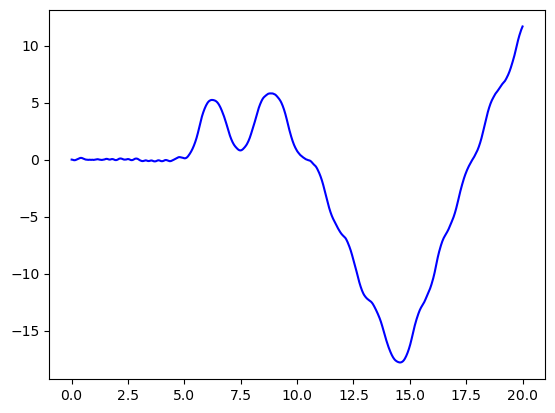

In [2]:
from scipy.io import loadmat
import numpy as np
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#put the 'U.mat' file inside the File folder
uvec = loadmat('U.mat')
uvec = uvec['U'][0]

def cart_and_pole_odeint(x, t, F):
  dxdt = np.zeros_like(x)
  g = 9.8 # gravitational acceleration
  mc = 1  # cart mass [kg]
  l = 0.5 # half-pole length [m]
  m = 0.1 # pole mass [kg]
  miup = 0.000002 # pole friction coefficient
  #teta=x(1)  pc=x(3)
  dxdt[0] = x[1] #tetap
  dxdt[1] = ((g*sin(x[0]))+(cos(x[0])*((-F-(m*l*(x[1]**2)*sin(x[0])))/(mc+m)))-((miup*x[1])/(m*l)))/(l*((4/3)-((m*((cos(x[0]))**2))/(mc+m))))    #teta2p
  dxdt[2] = x[3] #xp
  dxdt[3] = (F+(m*l*(((x[1]**2)*sin(x[0]))-((((g*sin(x[0]))+(cos(x[0])*((-F-(m*l*(x[1]**2)*sin(x[0])))/(mc+m)))-((miup*x[1])/(m*l)))/(l*((4/3)-((m*((cos(x[0]))**2))/(mc+m)))))*cos(x[0])))))/(mc+m) #x2p
  return dxdt

time_step=0.02
t0_odeint=0
x0_odeint = np.array([0.0, 0.0, 0.0, 0.0])
X_odeint=[x0_odeint]

for i in range(len(uvec)):
  t1_odeint = t0_odeint+0.02
  t_odeint = np.array([t0_odeint, t1_odeint])
  F = uvec[i]
  x_odeint = odeint(cart_and_pole_odeint, x0_odeint, t_odeint, args=(F, ))
  x0_odeint = x_odeint[1]
  X_odeint=np.append(X_odeint, [x0_odeint], axis= 0)

time_sim=np.arange(0.0, 20, time_step)
plt.plot(np.arange(0.0, 20+time_step, time_step), X_odeint[:,0], 'b', label='theta(t)')